## Predicting diabetes using Machine Learning

This notebook looks into using Python-based ML and Data Science libraries in an attempt to build a ML model capable of predicting whether or not someone has diabetes based on their medical attributes

Steps to follow:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
Given clinical parameters about a patient, can we predict whether or not they have diabetes?

## 2. Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Available at https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has diabetes during the proof of concept, we will pursue the project.

## 4. Features

- Pregnancies = Number of times pregnant
- Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure = Diastolic blood pressure (mm Hg)
- SkinThickness = Triceps skin fold thickness (mm)
- Insulin = 2-Hour serum insulin (mu U/ml)
- BMI = Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction = Diabetes pedigree function
- Age = Age (years)
- Outcome = Class variable (1 = True, 0 = False) 268 of 768 are 1, the others are 0

## Preparing the tools

We are going to use Pandas, Matplotlib and NumPy for Data analysis and manipulation



In [2]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plottling libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [13]:
df = pd.read_csv("diabetes.csv")
df.shape #(rows, columns)

(768, 9)

## Data Exploration (EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with

1. What questions(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
# Let's find out how many of each class there
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
# Any missing values?
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Age vs Plasma glucose concentration for Diabetes

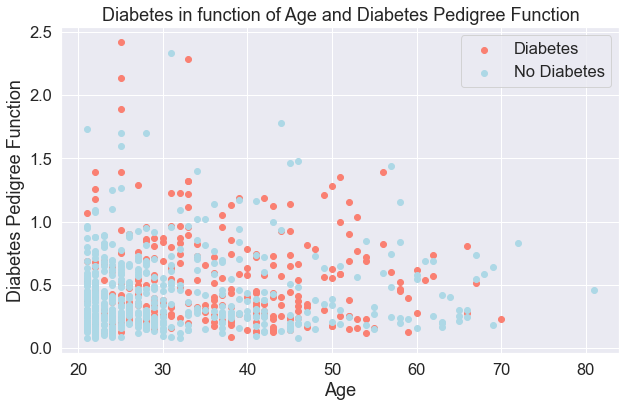

In [114]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.Age[df.Outcome==1],
            df.DiabetesPedigreeFunction[df.Outcome==1],
            c="Salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.Outcome==0],
            df.DiabetesPedigreeFunction[df.Outcome==0],
            c="Lightblue")
# Add some helpful info
plt.title("Diabetes in function of Age and Diabetes Pedigree Function")
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function")
plt.legend(["Diabetes", "No Diabetes"])

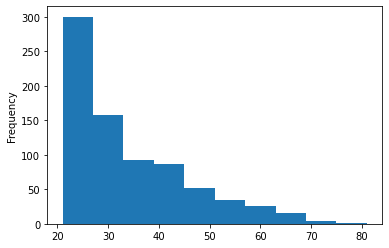

In [25]:
# Check the distribution of the Age column with a histogram
df.Age.plot.hist();

In [26]:
# Make a correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


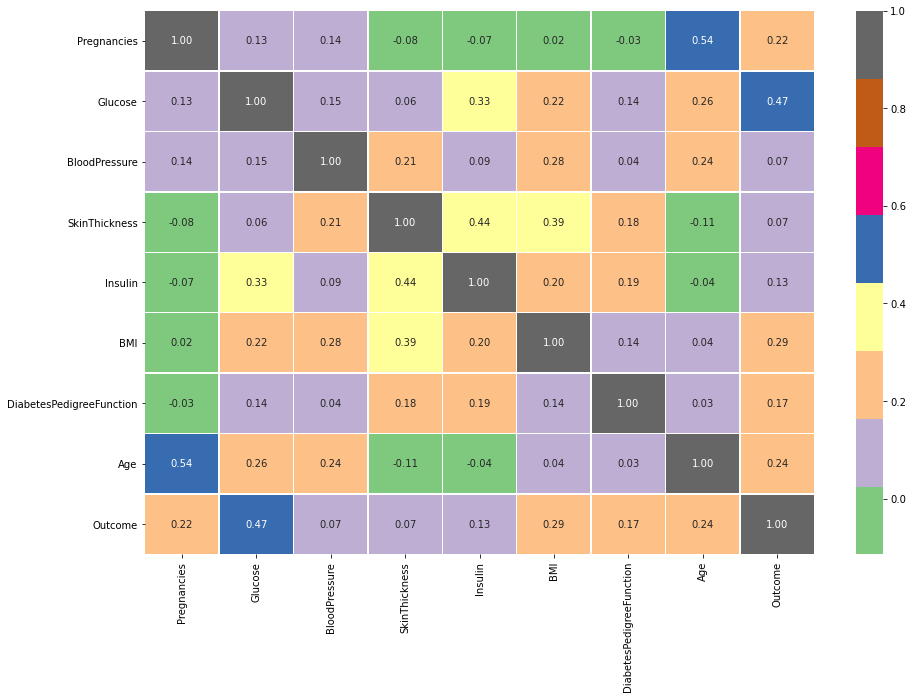

In [31]:
# Make another correlation Matix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="Accent");

# 5. Modelling

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# Split data into X and Y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [35]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [38]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [39]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

Now we have got our data split into training and test sets, it's time to build a ML model.
We will train it to find patterns on the training set and we will test it and use the pattterns on the test set.

We are going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [41]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models
    models: a dict of different Scikit-Learn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    #Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [42]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/Users/adamkamarul/Documents/ML-projects/sample-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7597402597402597,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

# Model Comparison

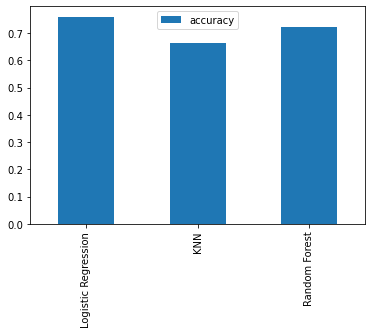

In [43]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning

In [46]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [47]:
train_scores

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

In [48]:
test_scores

[0.6753246753246753,
 0.7012987012987013,
 0.6493506493506493,
 0.7077922077922078,
 0.6623376623376623,
 0.7272727272727273,
 0.6883116883116883,
 0.7467532467532467,
 0.7207792207792207,
 0.7662337662337663,
 0.7337662337662337,
 0.7792207792207793,
 0.7727272727272727,
 0.7727272727272727,
 0.7597402597402597,
 0.7792207792207793,
 0.7727272727272727,
 0.7597402597402597,
 0.7532467532467533,
 0.7272727272727273]

Maximum KNN score on the test data: 77.92%


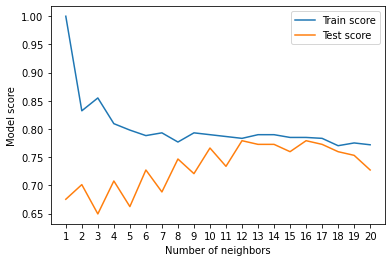

In [51]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
- LogisticRegression()
- RandomForestClassifier()

with the use of RandomizedSearchCV

In [64]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1,20,2)}

We have got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [66]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [67]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [68]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

Now we have tuned LogisticRegression(), Let's do the same for RandomForestClassifier()

In [65]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
# Find the best hyperparameters

rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [70]:
# Evaluate the randomized search RandomForestClassifier model

rs_rf.score(X_test, y_test)

0.7467532467532467

# Hyperparameter Tuning with GridSearchCV



In [72]:
# Different hypoerparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [73]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [75]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.7532467532467533

In [76]:
model_scores

{'Logistic Regression': 0.7597402597402597,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207}

## Evaluating our tuned ML classifier, beyond accuracy

- ROC curve and AUC curve
- Confusion Matrix
- Classification report
- Precision
- Recall
- F1 Score

and it would be great if ccross-validation was used where possible

To make comparisons and evaluate our tuned model, first we need to make predictions

In [78]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [79]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

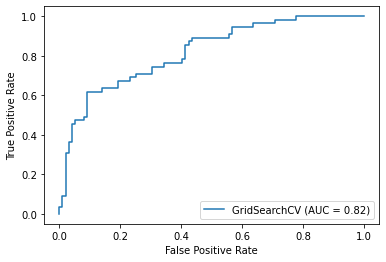

In [80]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [81]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[80 19]
 [19 36]]


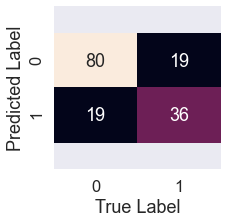

In [83]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

We have got a ROC curve, an AUC metric and a confusion matrix, let's getn a classification report as well as cross-validated precision, recall and f1-score.

In [84]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Calculate evaluation metrics using cross-validation

We are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'

In [85]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [86]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=2.592943797404667,
                        solver="liblinear")

In [89]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.76623377, 0.74025974, 0.74025974, 0.81045752, 0.77124183])

In [91]:
cv_acc=np.mean(cv_acc)
cv_acc

0.7656905186316951

In [92]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision

array([0.70454545, 0.63461538, 0.69444444, 0.8       , 0.73684211])

In [93]:
cv_precision=np.mean(cv_precision)
cv_precision

0.7140894777736884

In [96]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall

array([0.57407407, 0.61111111, 0.46296296, 0.60377358, 0.52830189])

In [97]:
cv_recall=np.mean(cv_recall)
cv_recall

0.5560447239692523

In [98]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.63265306, 0.62264151, 0.55555556, 0.68817204, 0.61538462])

In [99]:
cv_f1=np.mean(cv_f1)
cv_f1

0.6228813569218751

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

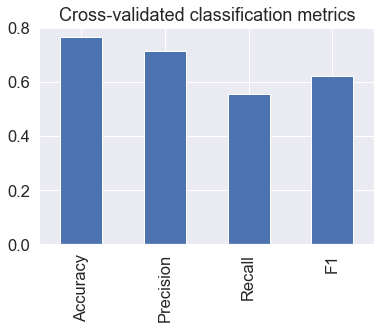

In [101]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

# Feature Importance

Feature importance is another why of asking, "Which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each ML model.

Let's find the feature importance for our Logistic Regression model.

In [106]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=2.592943797404667,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [107]:
# Check coef_
clf.coef_

array([[ 0.06604403,  0.02949931, -0.01616723,  0.00243509, -0.00136445,
         0.08142631,  0.56053433,  0.03013018]])

In [108]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.06604402765642257,
 'Glucose': 0.029499309354222906,
 'BloodPressure': -0.016167227092402627,
 'SkinThickness': 0.002435088367021687,
 'Insulin': -0.0013644466066618473,
 'BMI': 0.08142631289161957,
 'DiabetesPedigreeFunction': 0.5605343251292403,
 'Age': 0.030130179677234442}

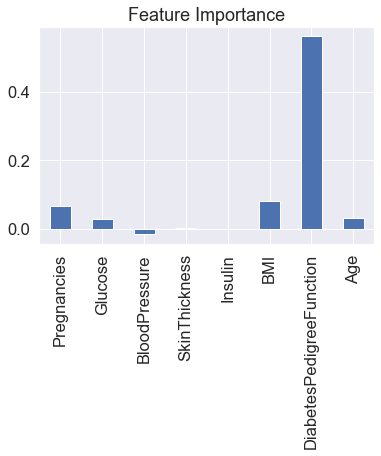

In [111]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [113]:
pd.crosstab(df["BMI"], df["Outcome"])

Outcome,0,1
BMI,,
0.0,9,2
18.2,3,0
18.4,1,0
19.1,1,0
19.3,1,0
...,...,...
53.2,0,1
55.0,0,1
57.3,1,0
